### Aarif Munwar Jahan
### December 17th, 2021

### This notebook contains the visual analysis module for CIS 9760 Fall 2021 Project 3

#### The analysis will contain three visualizations as follows:

1. Interactive Stock Trend Line Plot - Line plot to show stock price changes trend over time of day - single select panel widget buttons to allow for interactive stock ticker selection.

2. Interactive Stock Trend Line Plot Cumulative - Line plot to show stock price changes trend for all stock tickers over time of day - multi select panel widget buttons to allow adding/removing certain stock tickers from the chart.

3. Hourly Stock Heatmap - Heatmap to show stock prices distribution for all stock tickers over time of day - multi select panel widget buttons to allow adding/removing certain stock tickers from the chart.

#### Finally, for easier access to this visualization module, a public web application is deployed that contains all of the three charts in this module and allows the user to access these interative charts via a web browser without needing to interact with the python backend. Here is the link to the web application: https://stockpriceviz.herokuapp.com/

In [1]:
# Import pandas, numpy and matplorlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

# Import panel library
import panel as pn
from panel import widgets

# Set ggplot as the matplotlib style for this notebook
plt.style.use('ggplot')

# To display the output of plotting commands inline within frontends like the Jupyter notebook
%matplotlib inline

# Declare panel extension
pn.extension()


In [2]:
# Read data from the csv file and store in a pandas dataframe
df = pd.read_csv("results.csv")

In [3]:
# Explore data
df.head()

,Company,Time,HourOfDay,HighestStockPrice
0,BYND,09:00,1,74.54
1,BYND,10:00,2,73.28
2,BYND,11:00,3,71.04
3,BYND,12:00,4,71.02
4,BYND,13:00,5,71.24


## Visualization 1 - Interactive Stock Trend Line Plot

In [4]:
# Add widget for the Radio button group to allow for ticker selection 
uStock = pn.widgets.RadioButtonGroup(name="Select Stock Ticker", value = 'BYND', options = list(df.Company.unique()))

# Test widget look
uStock

RadioButtonGroup(name='Select Stock Ticker', options=['BYND', 'DDOG', ...], value='BYND')

In [5]:
# Define reactive function to show stock trends based on ticker selection
@pn.depends(uStock)
def stock_trend(uSVar):
    
    # Filter based on widget ticker selection
    dframe = df[df.Company == uSVar]
    
    # Create the figure container and subplot - use tight_layout to ensure auto resizing with changing regions
    rFig = plt.Figure(figsize=(12, 6), tight_layout = True)
    rPlot = rFig.add_subplot()
    
    # Plot trend line plot
    ax = dframe.plot.line('Time', 'HighestStockPrice', ax=rPlot, legend = False)
    
    # Update grid visibilty and format tick labels
    ax.grid(linestyle='-', linewidth=0.35, axis = 'y')
    ax.grid(b=None, axis = 'x')
    
    # Set dynamic chart title and axes labels
    ax.set_title(f"Hourly Stock Trend on 30th November, 2021 for {uSVar}", fontweight = 'bold', color = 'dimgray')
    ax.set_xlabel('Time', fontweight = "bold")
    ax.set_ylabel('Stock Price', fontweight = "bold")
    
    # Format y-axis tick labels as currency
    formatter = ticker.FormatStrFormatter('$%1.2f')
    ax.yaxis.set_major_formatter(formatter)
    
    # Return final figure                   
    return rFig

Column
    [0] RadioButtonGroup(name='Select Stock Ticker', options=['BYND', 'DDOG', ...], value='BYND')
    [1] ParamFunction(function)
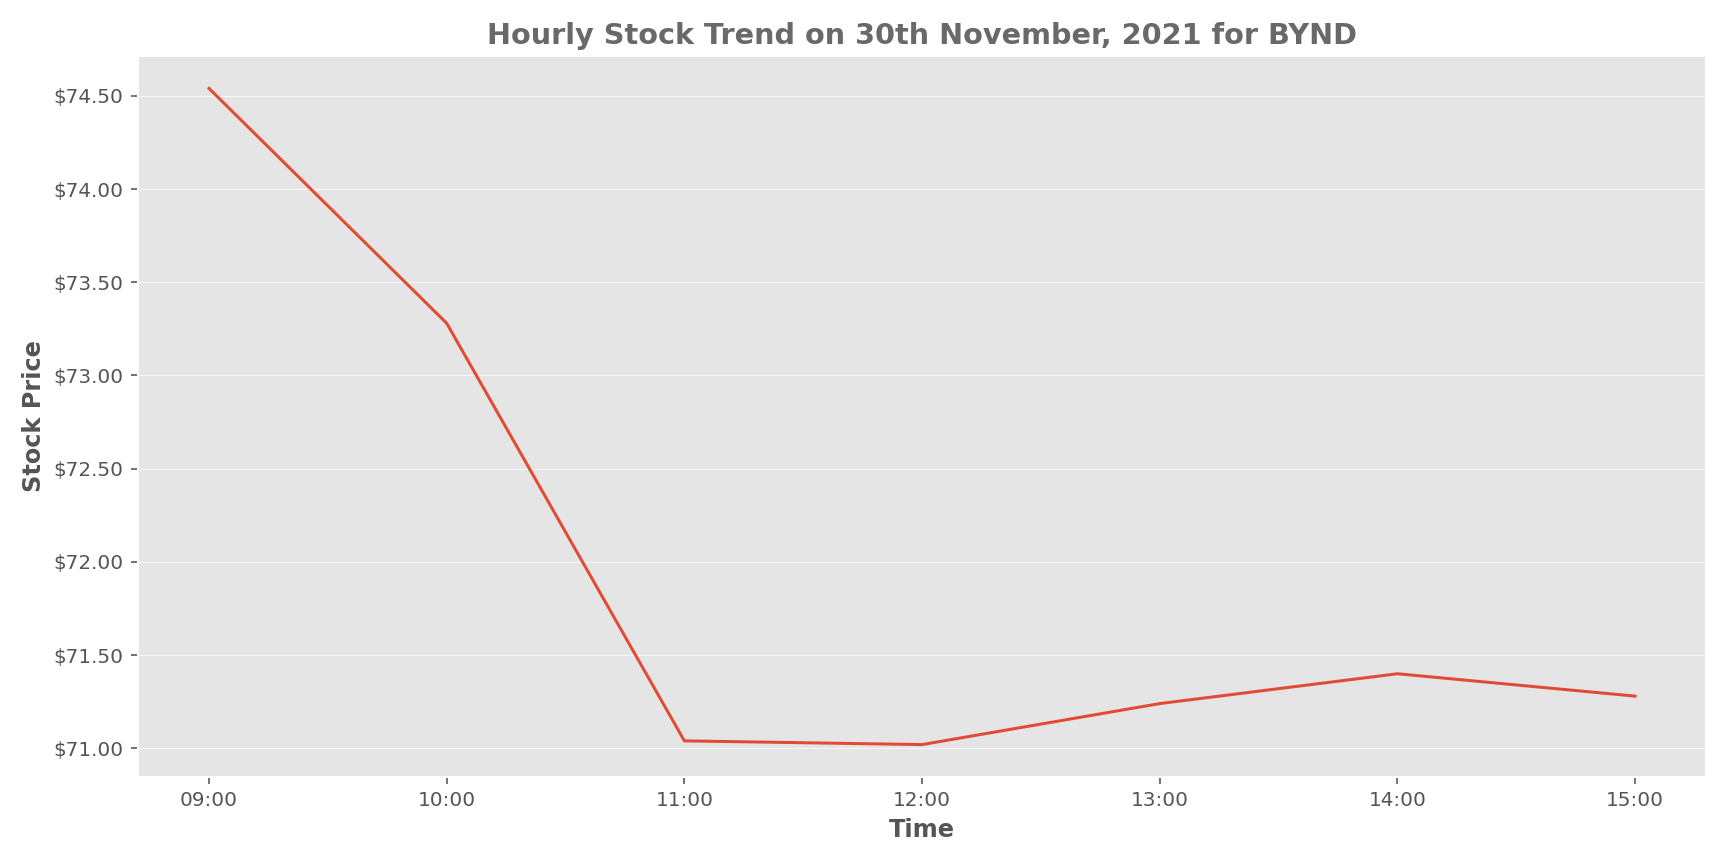

In [6]:
# Display Stock Trend Visualization
pn.Column(uStock, stock_trend)

## Visualization 2 - Interactive Stock Trend Line Plot - Cumulative

In [7]:
# Pivot original table in preperation for visualization
df1 = pd.pivot_table(df, values='HighestStockPrice', index=['Time'],
                    columns=['Company'], aggfunc=np.sum)

In [8]:
# Display pivoted table
df1

Company,BYND,DDOG,FB,NFLX,OKTA,PINS,SHOP,SNAP,SQ,TTD
Time,,,,,,,,,,
09:00,74.54,186.21,335.37,675.20,226.46,41.71,1629.94,49.40,217.75,110.87
10:00,73.28,184.10,335.81,675.38,225.35,41.64,1625.99,49.07,215.46,110.28
11:00,71.04,178.54,329.80,661.99,217.08,40.43,1561.98,47.33,210.63,105.83
12:00,71.02,177.21,328.29,658.24,216.18,40.09,1544.77,46.98,209.11,103.85
13:00,71.24,177.73,328.02,651.35,216.71,40.12,1533.19,47.28,208.41,104.69
14:00,71.40,179.39,328.18,650.59,216.37,40.23,1536.21,47.13,209.03,105.12
15:00,71.28,179.81,327.30,645.95,215.88,40.42,1529.80,47.68,210.63,104.68


In [9]:
# Add widget for check button that allows for multiple stock ticker selection
uStockMulti = pn.widgets.CheckButtonGroup(
    name='Select Stock Tickers', value = ['BYND', 'PINS', 'SNAP'], 
    options=list(df.Company.unique()), inline = False)

# Test widget look
uStockMulti

CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'PINS', 'SNAP'])

In [10]:
# Define reactive function to show cumulative stock trends based on ticker selection
@pn.depends(uStockMulti)
def stock_trend_cumulative(uSMVar):
    
    # Filter based on widget ticker multi selection
    dframe = df1[list(uSMVar)]
    
    # Create the figure container and subplot
    rFig = plt.Figure(figsize=(12, 6), tight_layout = True)
    rPlot = rFig.add_subplot()
    
    # Plot trend line plot
    ax = dframe.plot.line(ax=rPlot)
    
    # Update grid visibilty and format tick labels
    ax.grid(linestyle='-', linewidth=0.35, axis = 'y')
    ax.grid(b=None, axis = 'x')
    
    # Set chart title and axes labels
    ax.set_title(f"Hourly Stock Trends on 30th November, 2021", fontweight = 'bold', color = 'dimgray')
    ax.set_xlabel('Time', fontweight = "bold")
    ax.set_ylabel('Stock Price', fontweight = "bold")
    
    # Format y-axis tick labels as currency
    formatter = ticker.FormatStrFormatter('$%1.2f')
    ax.yaxis.set_major_formatter(formatter)

    # Legend added to the bottom to avoid clash with data 
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    #ax.legend(loc='cent center', bbox_to_anchor=(0.5, -0.167),
          #fancybox=True, shadow=True, ncol=5)
    
    # Return final figure                   
    return rFig

Column
    [0] CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'PINS', 'SNAP'])
    [1] ParamFunction(function)
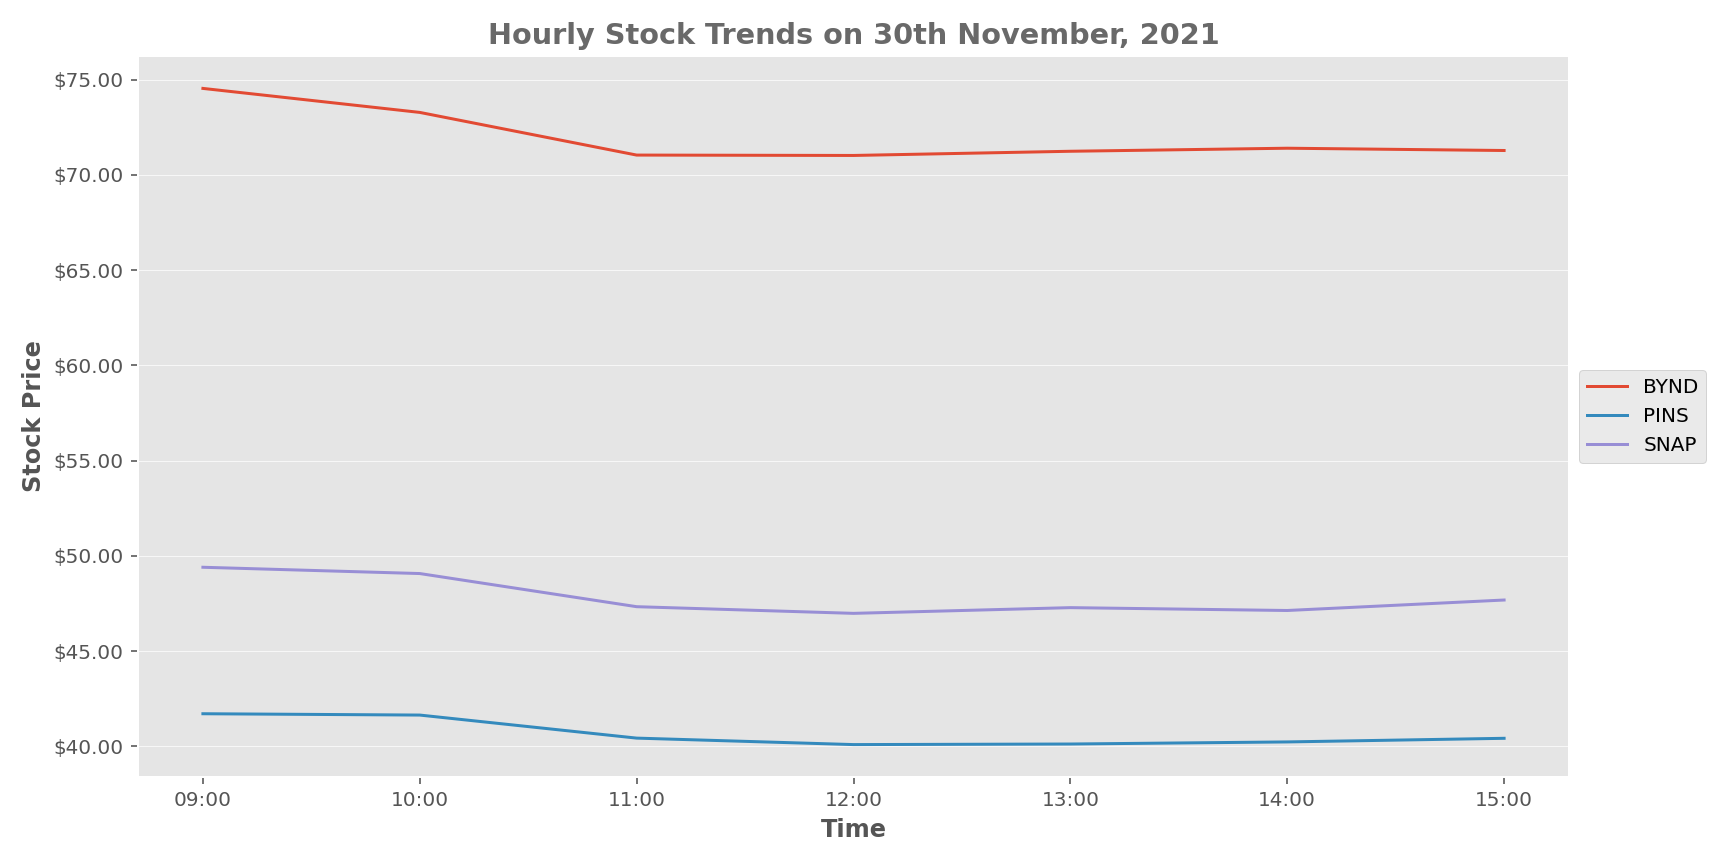

In [11]:
# Display Stock Trend Visualization
pn.Column(uStockMulti, stock_trend_cumulative)

## Visualization 3 - Stock Price Heatmap

In [12]:
# Pivot original table in preperation for visualization
df2 = pd.pivot_table(df, values='HighestStockPrice', index=['Company'],
                    columns=['Time'], aggfunc=np.sum)

In [13]:
# Display pivoted table
df2

Time,09:00,10:00,11:00,12:00,13:00,14:00,15:00
Company,,,,,,,
BYND,74.54,73.28,71.04,71.02,71.24,71.40,71.28
DDOG,186.21,184.10,178.54,177.21,177.73,179.39,179.81
FB,335.37,335.81,329.80,328.29,328.02,328.18,327.30
NFLX,675.20,675.38,661.99,658.24,651.35,650.59,645.95
OKTA,226.46,225.35,217.08,216.18,216.71,216.37,215.88
PINS,41.71,41.64,40.43,40.09,40.12,40.23,40.42
SHOP,1629.94,1625.99,1561.98,1544.77,1533.19,1536.21,1529.80
SNAP,49.40,49.07,47.33,46.98,47.28,47.13,47.68
SQ,217.75,215.46,210.63,209.11,208.41,209.03,210.63


In [14]:
# Add widget for check button that allows for multiple stock ticker selection
uStockMulti2 = pn.widgets.CheckButtonGroup(
    name='Select Stock Tickers', value = list(df.Company.unique()), 
    options=list(df.Company.unique()), inline = False)

# Test widget look
uStockMulti2

CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'DDOG', ...])

In [15]:
# Define reactive function to show cumulative stock trends based on ticker selection
@pn.depends(uStockMulti2)
def stock_heatmap_cumulative(uSMVar2):
    
    # Filter based on widget ticker multi selection
    dframe = df[df.Company.isin(uSMVar2)]
    
    # Pivot table in preperation for visualization
    dframe = pd.pivot_table(dframe, values='HighestStockPrice', index=['Company'],
                    columns=['Time'], aggfunc=np.sum)
    
    
    # Create the figure container and subplot
    rFig = plt.Figure(figsize=(12, 6), tight_layout = True)
    rPlot = rFig.add_subplot()
    
    # Plot heatmap line plot
    ax = sns.heatmap(dframe, ax = rPlot, cmap='YlGnBu', cbar_kws={'label': '', 'format': ticker.FormatStrFormatter('$%1.2f')})
    
    # Fix y axis label rotation
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
    
    # Set chart title and axes labels
    ax.set_title(f"Hourly Stock Heatmap on 30th November, 2021", fontweight = 'bold', color = 'dimgray')
    ax.set_xlabel('Time', fontweight = "bold")
    ax.set_ylabel('Company', fontweight = "bold")

    # Return final figure                   
    return rFig

Column
    [0] CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'DDOG', ...])
    [1] ParamFunction(function)
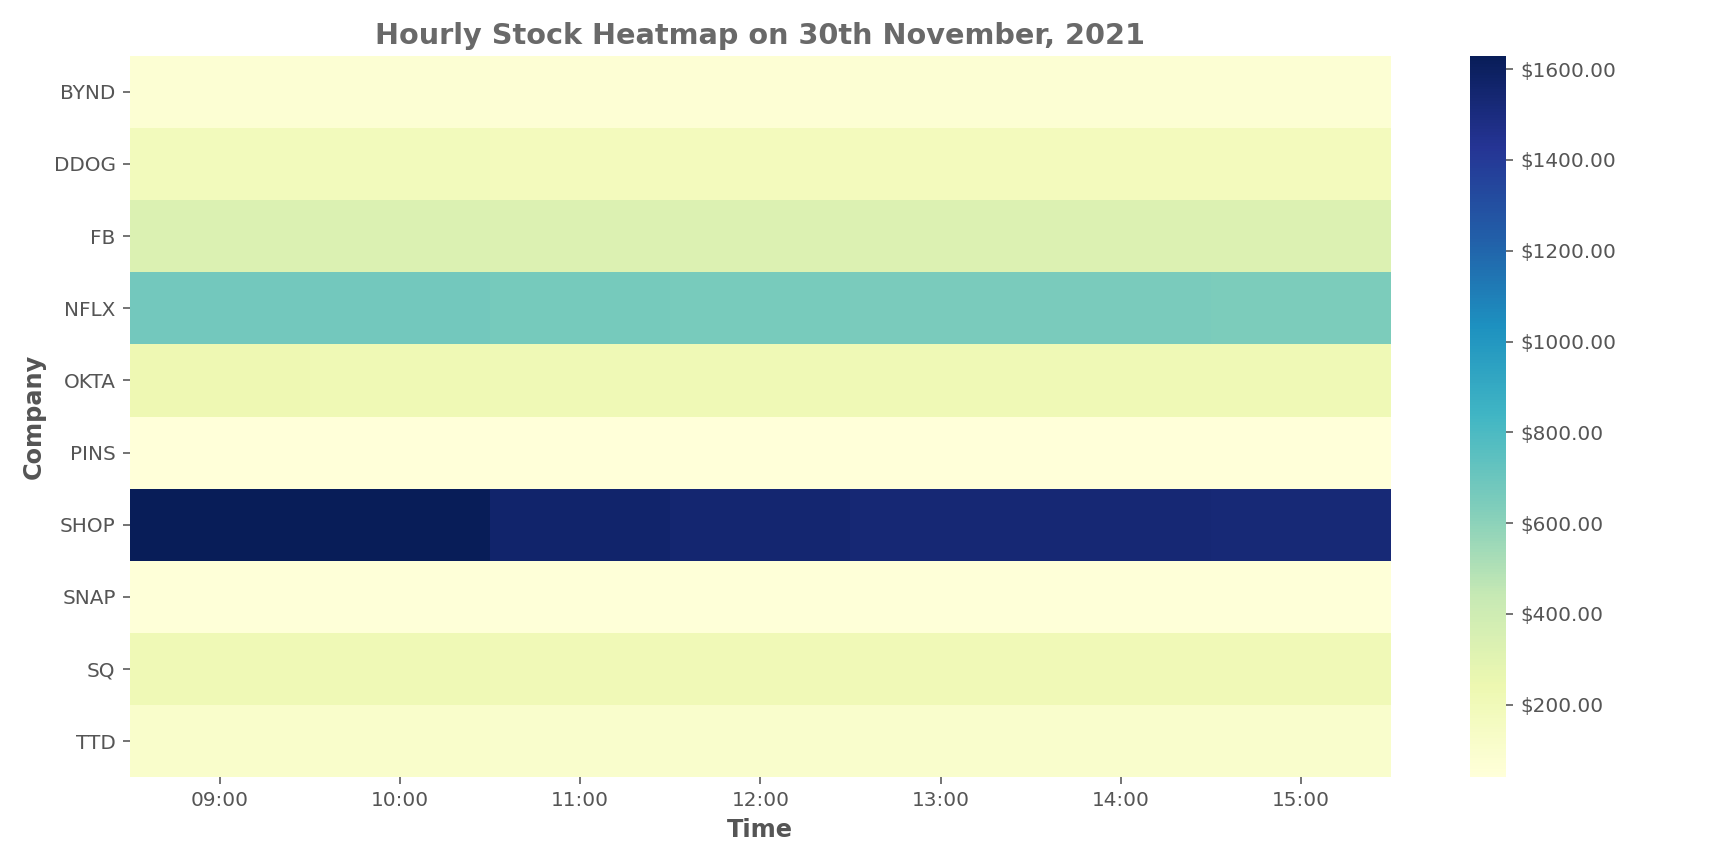

In [16]:
# Display Stock Trend Visualization
pn.Column(uStockMulti2, stock_heatmap_cumulative)

## Web Application Deployment - Heroku App

In [17]:
# Add a title for the chart
title = pn.pane.Markdown('''
## <span style="color:SteelBlue">** CIS 9760 Fall 2021 Project 3 Visualization App **</span>
### ** Visualizing Stock Prices with data from AWS Pipline **
#### ** Aarif Munwar Jahan **
#### ** December 17th, 2021 **
''',width=600)

# Create individual tabs for the three visualizations
tab0 = pn.Column(uStock, stock_trend)
tab1 = pn.Column(uStockMulti, stock_trend_cumulative)
tab2 = pn.Column(uStockMulti2, stock_heatmap_cumulative)

# Create master tab
tabs = pn.Tabs(("Stock Trends", tab0), 
               ("Stock Trends Cumulative", tab1), 
               ("Stock Distribution Heatmap", tab2),
               tabs_location = 'left')


Column
    [0] Markdown(str, width=600)
    [1] Spacer(height=10)
    [2] Tabs(tabs_location='left')
        [0] Column
            [0] RadioButtonGroup(name='Select Stock Ticker', options=['BYND', 'DDOG', ...], value='BYND')
            [1] ParamFunction(function)
        [1] Column
            [0] CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'PINS', 'SNAP'])
            [1] ParamFunction(function)
        [2] Column
            [0] CheckButtonGroup(name='Select Stock Tickers', options=['BYND', 'DDOG', ...], value=['BYND', 'DDOG', ...])
            [1] ParamFunction(function)
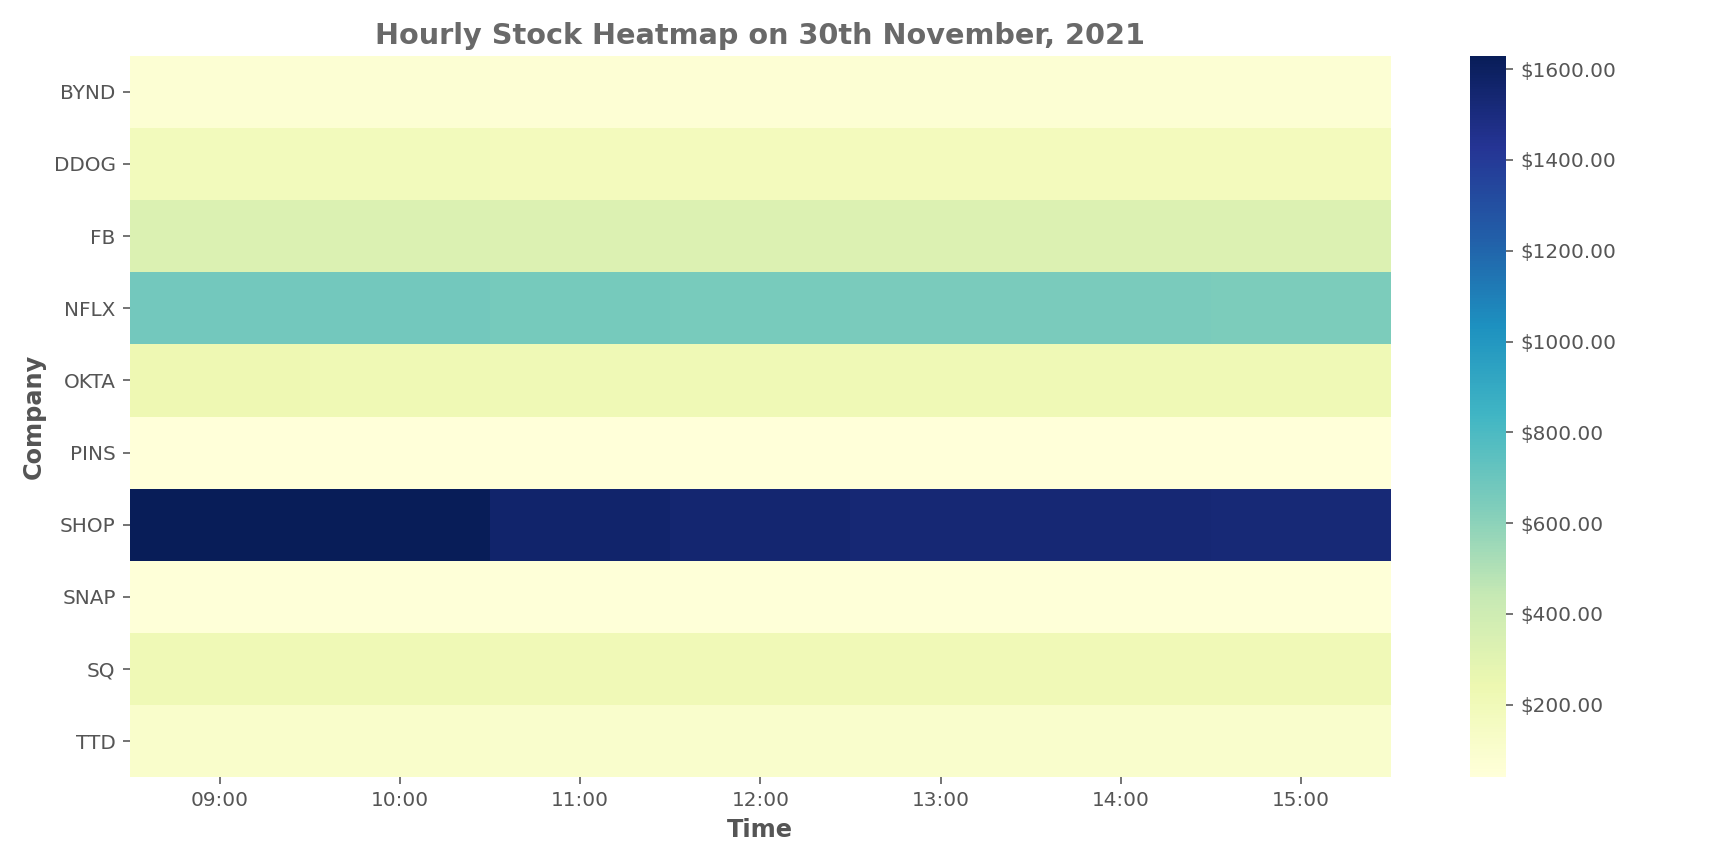
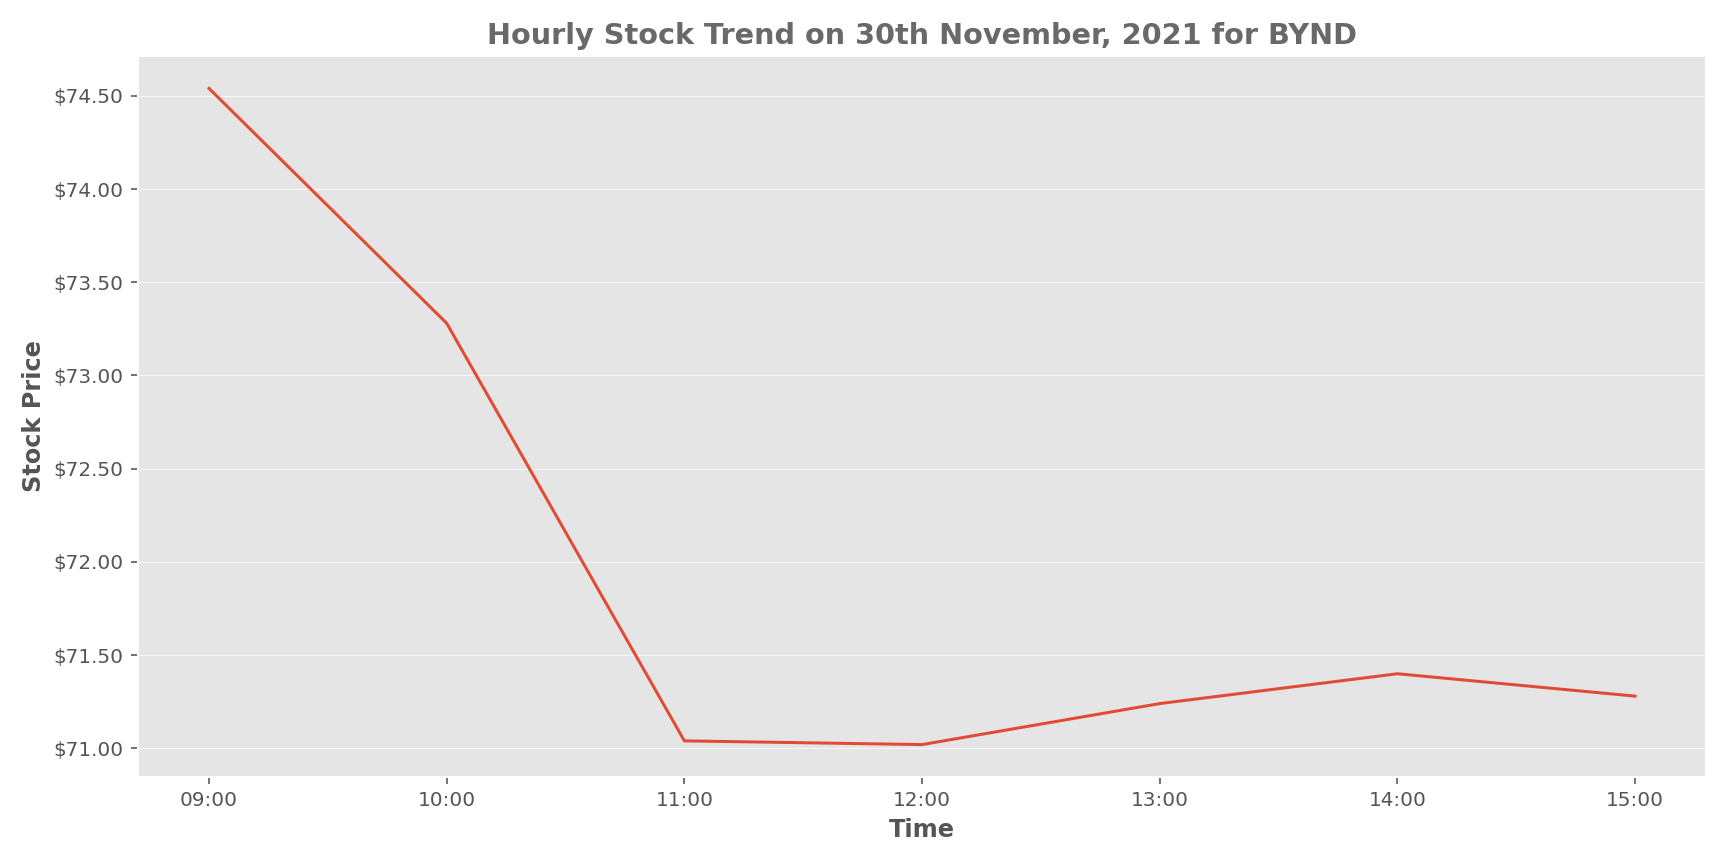
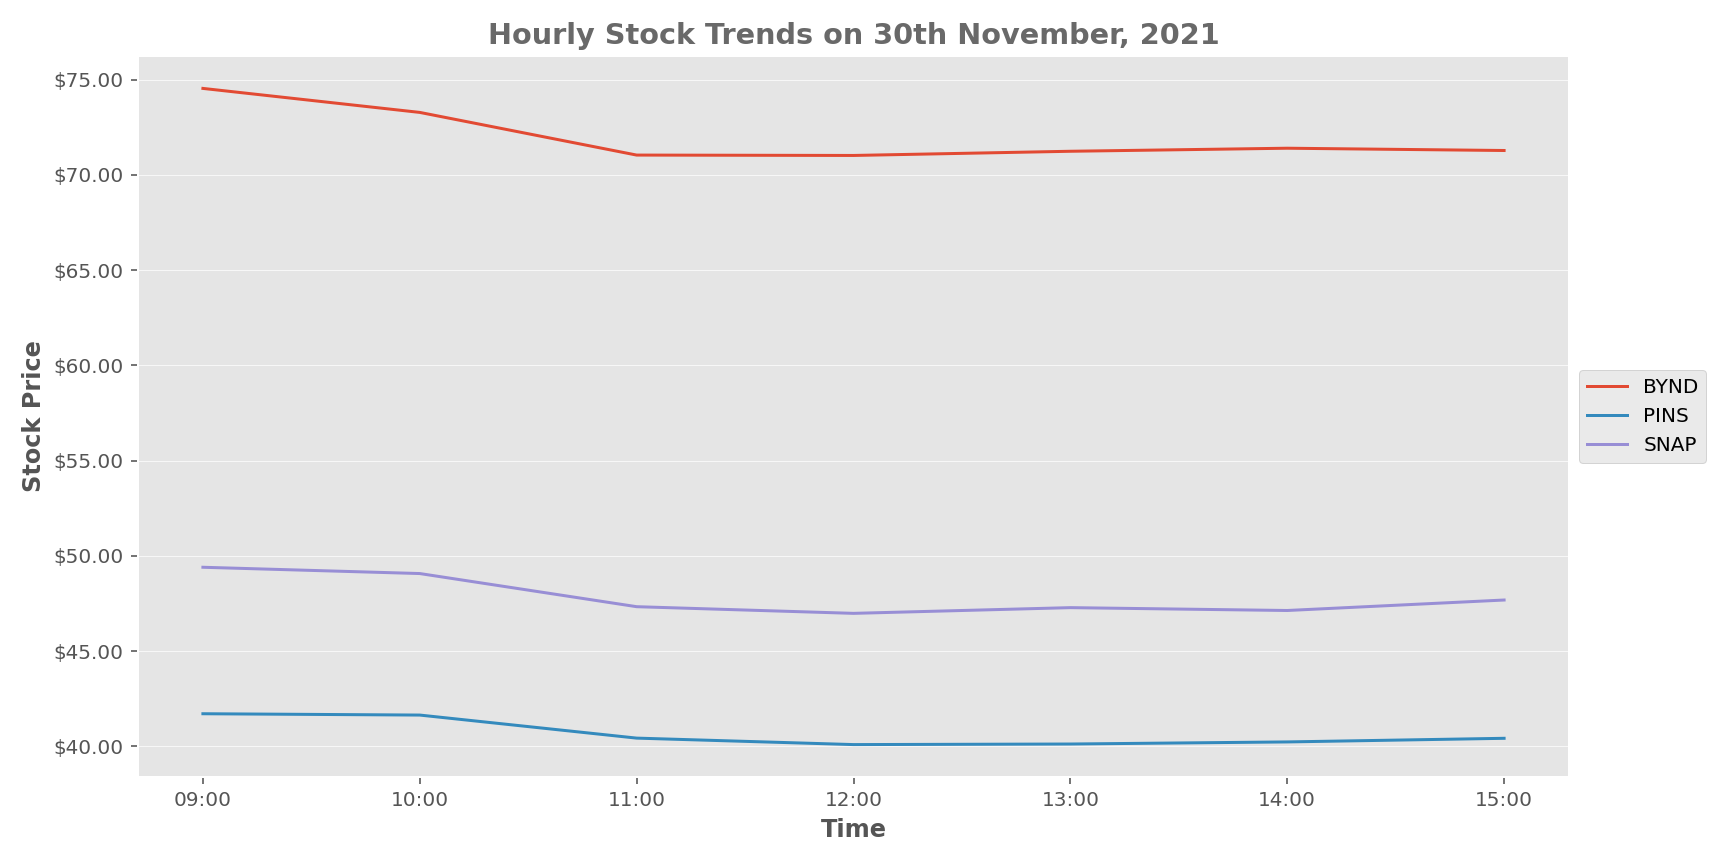

In [18]:
# Deploy app as servable content
pn.Column(title, pn.Spacer(height=10), tabs).servable(title="AWS Stock Prices")